In [41]:
from scipy.io import loadmat
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random
import itertools

In [42]:
mnist_data = loadmat('./mnist-original.mat')

In [43]:
mnist_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'mldata_descr_ordering', 'data', 'label'])

In [44]:
mnist = {
    "data": mnist_data["data"].T,
    "target": mnist_data["label"][0],
}
mnist.keys()

dict_keys(['data', 'target'])

In [45]:
mnist["data"].shape

(70000, 784)

In [46]:
data,label = mnist["data"], mnist["target"]

n = 51628
this is 8


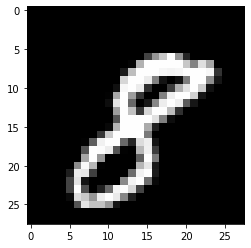

In [47]:
n = random.randint(0,data.shape[0])
number = data[n]
number_image = number.reshape(28,28)
print("n =",n)
print("this is", int(label[n]))
plt.imshow(number_image, cmap="gray", interpolation="nearest")

In [48]:
#x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.15, random_state=0)
x_train, x_test, y_train, y_test = data[:60000], data[60000:], label[:60000], label[60000:]
print("x_train.shape =", x_train.shape)
print("x_test.shape =", x_test.shape)
print("y_train.shape =", y_train.shape)
print("y_test.shape =", y_test.shape)

x_train.shape = (60000, 784)
x_test.shape = (10000, 784)
y_train.shape = (60000,)
y_test.shape = (10000,)


In [49]:
predict_number = random.randint(0,x_test.shape[0])
print("predict_number =", predict_number)

predict_number = 8886


In [50]:
def displayImage(image):
    plt.imshow(image, cmap=plt.cm.binary, interpolation="nearest")
    plt.show()

In [51]:
def displayPredict(clf, actually_y, x):
    print("actually_y =", actually_y)
    print("predict_y =", clf.predict([x][0]))

In [61]:
def displayConfusionMatrix(cm,cmap=plt.cm.GnBu):
    classes=["Other Number","Number 0"]
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title("Confusion Matrix")
    plt.colorbar()
    trick_marks=np.arange(len(classes))
    plt.xticks(trick_marks,classes)
    plt.yticks(trick_marks,classes)
    thresh=cm.max()/2
    for i , j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],'d'),
        horizontalalignment='center',
        color='white' if cm[i,j]>thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Actually')
    plt.xlabel('Prediction')
    plt.show()

In [53]:
#Binary Classifier can classify only true or false.
#Classifier is 0 or not 0.
y_train_0 = (y_train == 0)
y_test_0 = (y_test == 0)

In [54]:
sgd_clf = SGDClassifier()
sgd_clf.fit(x_train, y_train_0)

SGDClassifier()

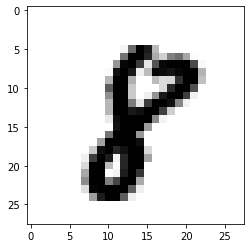

actually_y = False
predict_y = [False]


In [55]:
displayImage(x_test[predict_number].reshape(28,28))
displayPredict(sgd_clf, y_test_0[predict_number], x_test[predict_number].reshape(1,784))

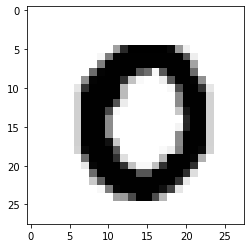

actually_y = True
predict_y = [ True]


In [56]:
displayImage(x_test[500].reshape(28,28))
displayPredict(sgd_clf, y_test_0[500], x_test[500].reshape(1,784))

In [57]:
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_0, cv=3)
cm = confusion_matrix(y_train_0, y_train_pred)

confusion matrix = [[52915  1162]
 [  449  5474]]


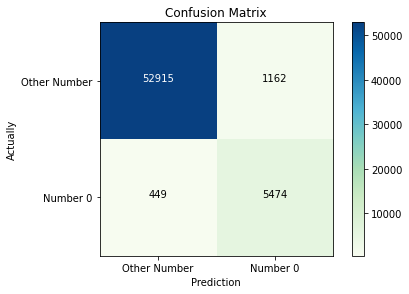

In [62]:
print("confusion matrix =", cm)
displayConfusionMatrix(cm)